# Defining Scope of the project

We are given two datasets one is for training and the other for testing. The datasets contains various features of customers in a database. Based on the features we have to predict what discount percentage we should give to the customers. As it is a numerical target we will train our model using regression models and various tree based models. We will try to find out which model gives us the best mean squared error and use that model to predict the discount percentage in test dataset which is previously not seen by our model.

# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSets

In [2]:
df_train = pd.read_csv("train.csv")

df_train.head()

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage
0,ID0xb02f,129.0,Active,2251.620000,261.26,04/02/2020 11:29 AM,129.0,4,4,4,129.0,215.0,No,34
1,ID0x8cff,NaN,Inactive,-450.457485,98.63,02/22/2016 04:08 AM,NaN,4,4,2,118.0,246.0,No,42
2,ID0xc812,100.0,Passive,1792.660000,144.00,08/23/2018 07:08 PM,100.0,4,4,5,66.0,121.0,No,31
3,ID0xedcd,87.0,Active,2260.730000,192.00,02/03/2020 06:31 AM,87.0,4,4,3,59.0,118.0,No,19
4,ID0x93c3,40.0,Passive,2083.890000,229.13,06/26/2019 01:30 PM,40.0,4,5,2,40.0,50.0,No,21


In [3]:
df_test = pd.read_csv("test.csv")

df_test.head()

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership
0,ID0x6d88,NaN,Passive,3107.81,104.180000,08/09/2019 06:47 PM,NaN,4,4,4,78.0,184.0,No
1,ID0xba29,87.0,Passive,1565.53,119.000000,05/01/2019 08:19 PM,87.0,4,4,2,87.0,121.0,Yes
2,ID0xf2e7,209.0,Active,2513.15,113.340000,01/21/2021 03:44 AM,209.0,4,4,4,114.0,256.0,Yes
3,ID0xa1c2,61.0,Passive,2277.55,53.199684,02/26/2019 08:10 AM,61.0,4,5,5,61.0,91.0,No
4,ID0xd67,218.0,Active,3117.99,344.070000,09/30/2020 10:14 AM,218.0,4,3,4,138.0,318.0,No


### Basic Checks

In [4]:
df_train.shape

(53802, 14)

In [5]:
df_test.shape

(9495, 13)

In [6]:
df_train.isnull().sum()

Customer_ID                     0
No_of_orders_placed          1575
Category_of_customers           0
Maximum_bill                    0
Minimum_bill                    0
Last_order_placed_date          0
No_of_issues_raised          1575
Customer_rating                 0
Average_food_rating             0
Average_happiness_rating        0
Coupon_consumption_status    1036
Coupons_offered              1569
Premium_membership              0
Discount_percentage             0
dtype: int64

# Handling Missing Values

We created a function that makes a new dataframe and shows us only the columns that contain missing values and their number of missing values

In [7]:
def find_missing(dataframe):
    missing_data_cols = dataframe.columns[dataframe.isnull().sum() > 0]
    null = dataframe.isnull().sum()
    null_df = pd.DataFrame(null,columns=["No_of_null_values"])
    null_df = null_df.loc[missing_data_cols]
    if len(null_df)>0:
        return null_df
    else:
        return "There are no null values!"
    

In [8]:
find_missing(df_train)

,No_of_null_values
No_of_orders_placed,1575
No_of_issues_raised,1575
Coupon_consumption_status,1036
Coupons_offered,1569


In [9]:
find_missing(df_test)

,No_of_null_values
No_of_orders_placed,298
No_of_issues_raised,298
Coupon_consumption_status,217
Coupons_offered,305


# Fill Missing Values

In [10]:
cols_to_fill = ['No_of_orders_placed', 'No_of_issues_raised','Coupon_consumption_status', 'Coupons_offered']

In [11]:
for i in cols_to_fill:
        df_train[i].fillna(df_train[i].median(),inplace =True)
        df_test[i].fillna(df_test[i].median(),inplace =True)

In [12]:
find_missing(df_train)

'There are no null values!'

In [13]:
find_missing(df_test)

'There are no null values!'

# Exploratory Data Analysis

### Univariate Analysis

In [14]:
df = df_train

In [15]:
df

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage
0,ID0xb02f,129.000000,Active,2251.620000,261.26,04/02/2020 11:29 AM,129.000000,4,4,4,129.0,215.0,No,34
1,ID0x8cff,127.000000,Inactive,-450.457485,98.63,02/22/2016 04:08 AM,127.000000,4,4,2,118.0,246.0,No,42
2,ID0xc812,100.000000,Passive,1792.660000,144.00,08/23/2018 07:08 PM,100.000000,4,4,5,66.0,121.0,No,31
3,ID0xedcd,87.000000,Active,2260.730000,192.00,02/03/2020 06:31 AM,87.000000,4,4,3,59.0,118.0,No,19
4,ID0x93c3,40.000000,Passive,2083.890000,229.13,06/26/2019 01:30 PM,40.000000,4,5,2,40.0,50.0,No,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53797,ID0x56a,250.000000,Active,3375.350000,148.97,11/17/2020 11:44 AM,250.000000,4,4,3,67.0,366.0,No,36
53798,ID0x82c8,226.000000,Passive,526.680000,208.94,11/18/2018 10:07 AM,226.000000,4,3,4,43.0,272.0,No,36
53799,ID0xafed,151.000000,Passive,3132.900000,264.12,12/28/2018 09:39 AM,151.000000,4,4,4,98.0,226.0,Yes,51
53800,ID0x9eff,230.000000,Inactive,1971.600000,101.73,05/29/2017 01:50 PM,230.000000,3,4,2,114.0,328.0,No,21


#### Convert the "Last_order_placed_date" column to datetime format

In [16]:
df['Last_order_placed_date'] = pd.to_datetime(df['Last_order_placed_date'], format='%m/%d/%Y %I:%M %p')
# Create new columns for date, month, and year
df['Order_date'] = df['Last_order_placed_date'].dt.date
df['Order_month'] = df['Last_order_placed_date'].dt.month
df['Order_year'] = df['Last_order_placed_date'].dt.year

In [17]:
catagorical_cols = df.select_dtypes("object")

numercial_cols = df.select_dtypes("number")

#### Ploting the numerical columns

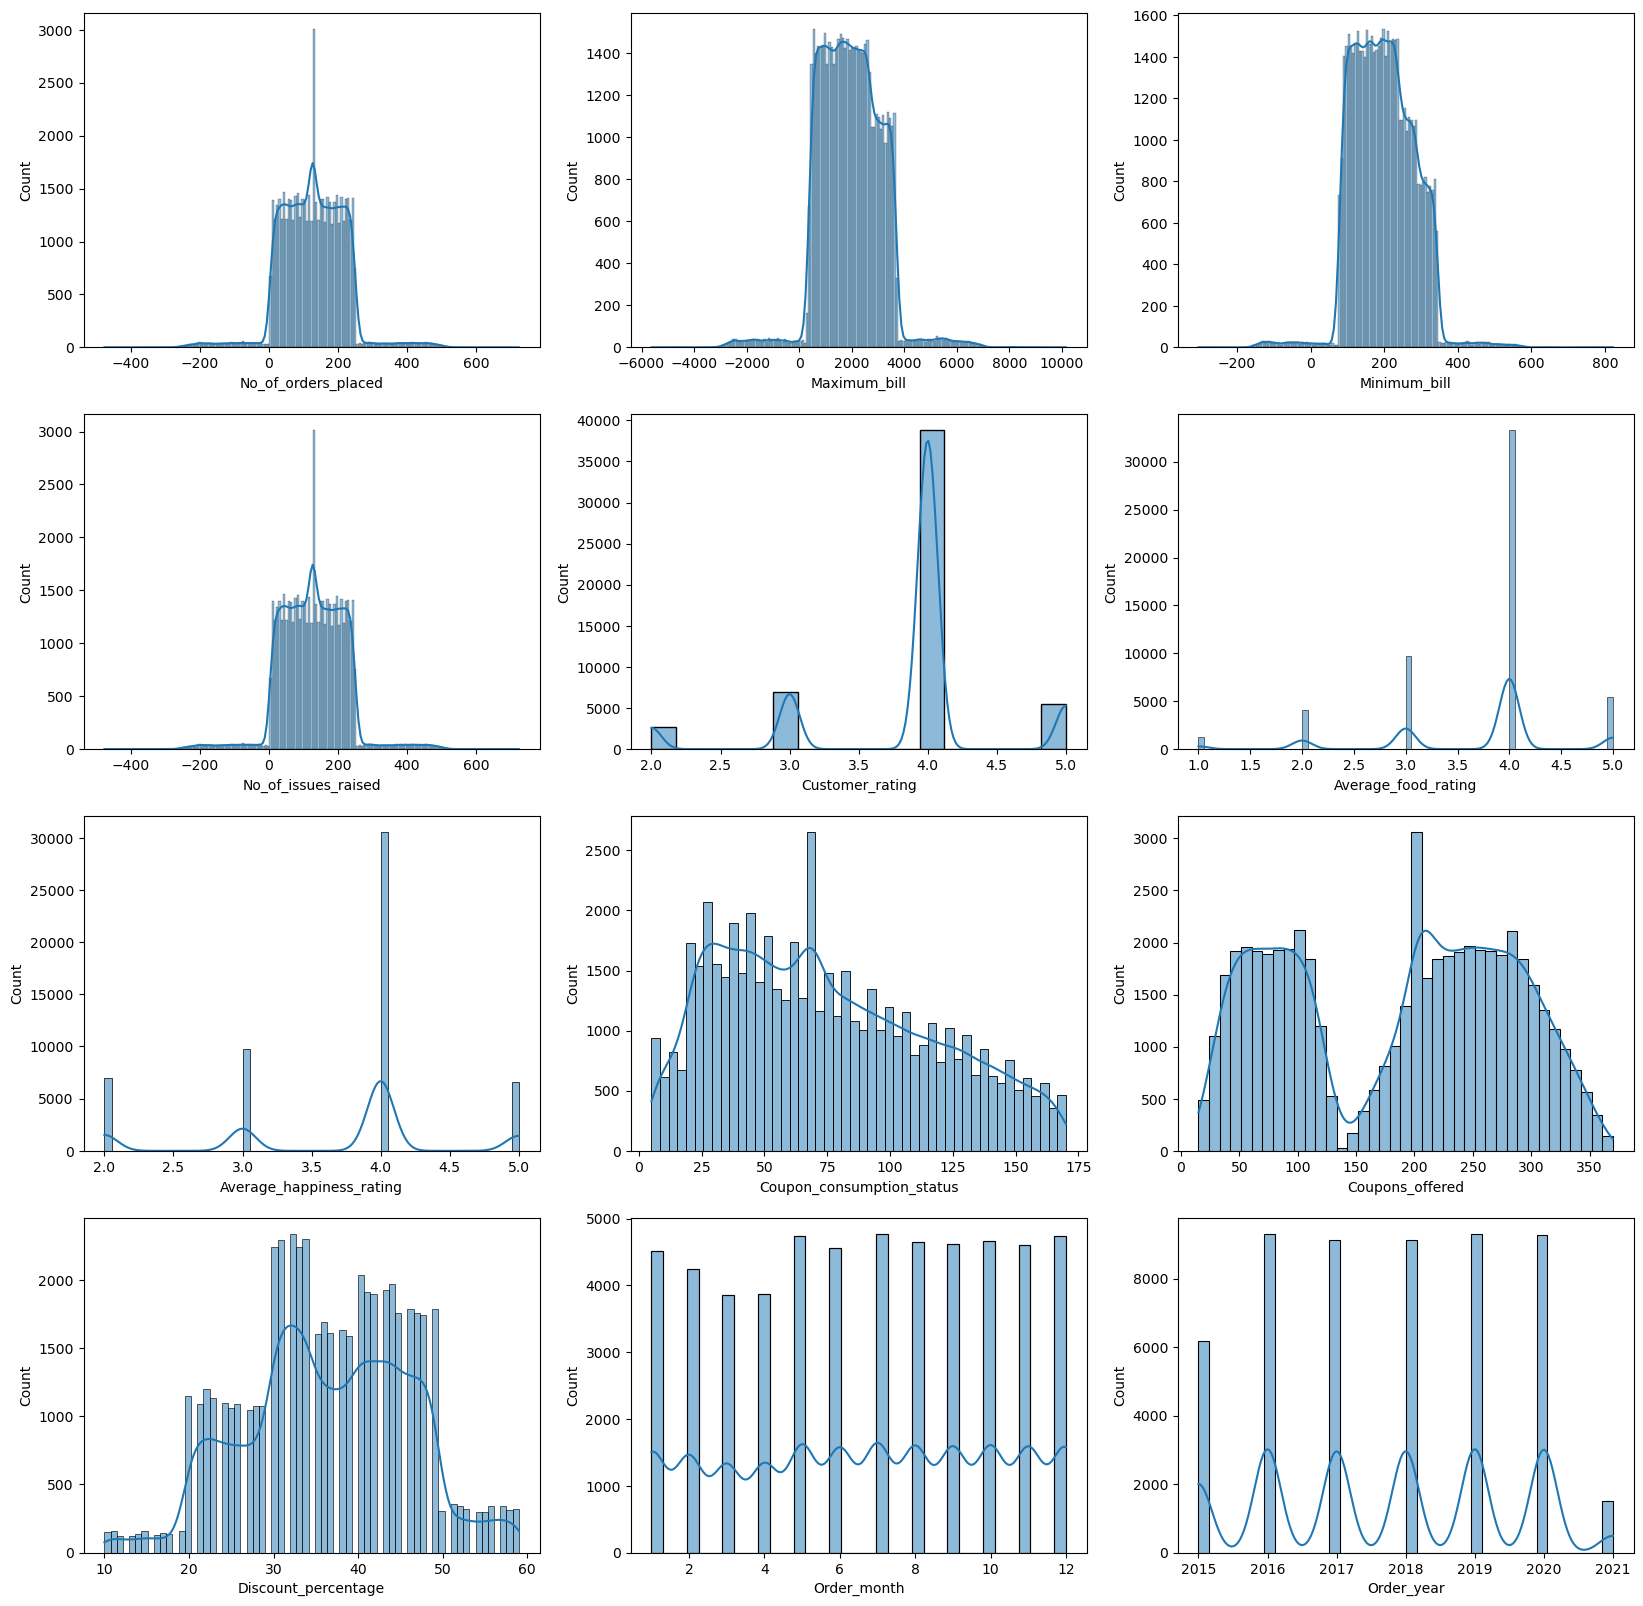

In [18]:
columns = numercial_cols.columns

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(data=numercial_cols, x=col, ax=axs[i],kde =True)

plt.show()

**Our Findings:**

1) 'No of orders placed' and 'No_of_issues_raised' are basically the same thing with different column name.

2) Our customers are spending around 2000 dollar  maximum and 200 dollar minimum.

3) Most of the ratings our customers give are '4'.

4) The more coupons offered the more customer will have coupons to spend so their coupon consumption status will increase.

5) Most customerd are being offered a discount of about 30-47%.

6) For the first four months from Jan to April we have less orders coming but then we have consistantly higher orders in the subsequents months. From 2016 to 2020 we had higher orders but for 2021 we are having substantially lower orders which may be a cause for concern.


#### Ploting the categorical columns

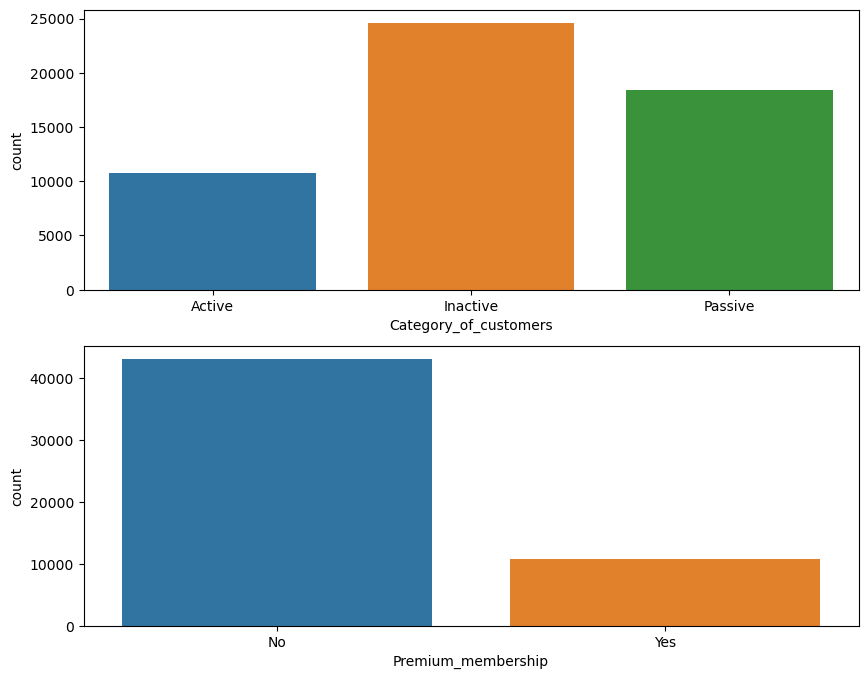

In [19]:
columns = catagorical_cols.columns[1:-1]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axs[i])

plt.show()

**Our Findings:**
    
1) We have very less active customers, most of our customers are eigher passive or inactive which can be a cause for concern.

2) Most of our customers dont have premium membership status.

### Bivariate Analysis

In [20]:
df.head()

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage,Order_date,Order_month,Order_year
0,ID0xb02f,129.0,Active,2251.620000,261.26,2020-04-02 11:29:00,129.0,4,4,4,129.0,215.0,No,34,2020-04-02,4,2020
1,ID0x8cff,127.0,Inactive,-450.457485,98.63,2016-02-22 04:08:00,127.0,4,4,2,118.0,246.0,No,42,2016-02-22,2,2016
2,ID0xc812,100.0,Passive,1792.660000,144.00,2018-08-23 19:08:00,100.0,4,4,5,66.0,121.0,No,31,2018-08-23,8,2018
3,ID0xedcd,87.0,Active,2260.730000,192.00,2020-02-03 06:31:00,87.0,4,4,3,59.0,118.0,No,19,2020-02-03,2,2020
4,ID0x93c3,40.0,Passive,2083.890000,229.13,2019-06-26 13:30:00,40.0,4,5,2,40.0,50.0,No,21,2019-06-26,6,2019


#### Finding the status of the discount percentage based on the membership of customers

<AxesSubplot:xlabel='Discount_percentage', ylabel='Count'>

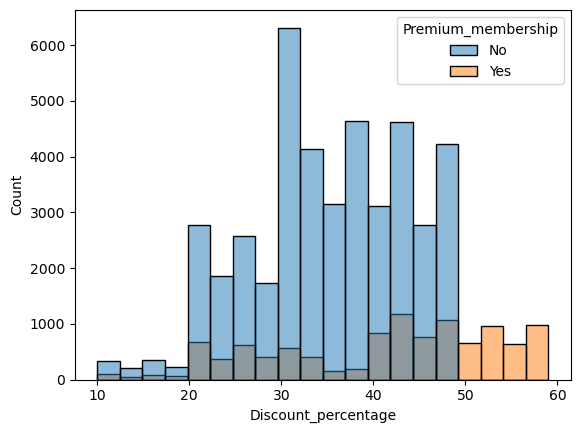

In [21]:
sns.histplot(data =df, x = 'Discount_percentage',bins = 20,hue = 'Premium_membership')

**Our Findings:**
    
Only premium membership customers have discount percentage of more than 49%.

#### Finding the status of the discount percentage based on the customer category

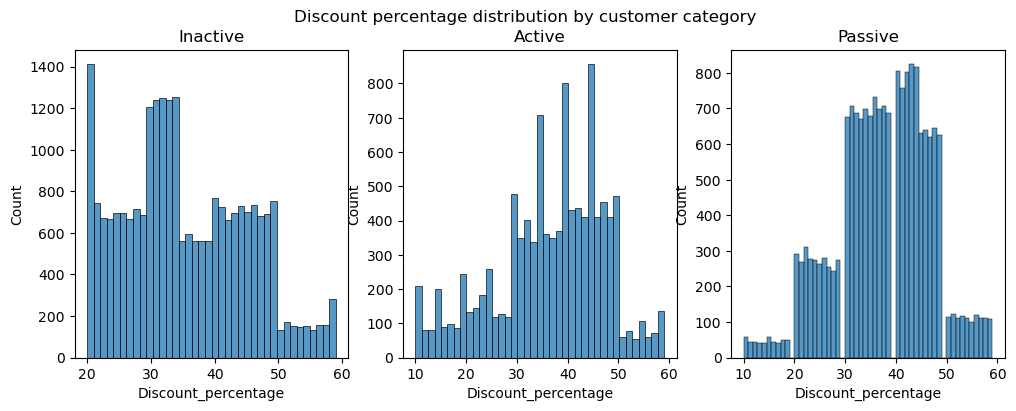

In [22]:
# Create subplots for the histograms
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

# Plot the histograms for each category
sns.histplot(data=df[df['Category_of_customers'] == 'Inactive'], x='Discount_percentage', ax=axes[0])
sns.histplot(data=df[df['Category_of_customers'] == 'Active'], x='Discount_percentage', ax=axes[1])
sns.histplot(data=df[df['Category_of_customers'] == 'Passive'], x='Discount_percentage', ax=axes[2])

# Set titles for the subplots
axes[0].set_title('Inactive')
axes[1].set_title('Active')
axes[2].set_title('Passive')

# Set the overall title for the figure
fig.suptitle('Discount percentage distribution by customer category')

# Show the figure
plt.show()

**Our Findings:**

1) Most of the Passive customers are getting the discounts of arounf 40-50%

2) Most of the Active customers are getting the discounts of arounf 30-45%

3) Most of the Inactive customers are getting the discounts of arounf 20-35%

# Label Encoding the data.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Category_of_customers']= le.fit_transform(df_train['Category_of_customers'])
df_test['Category_of_customers'] = le.transform(df_test['Category_of_customers'])

df_train['Premium_membership']= le.fit_transform(df_train['Premium_membership'])
df_test['Premium_membership'] = le.transform(df_test['Premium_membership'])

In [24]:
df_train

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage,Order_date,Order_month,Order_year
0,ID0xb02f,129.000000,0,2251.620000,261.26,2020-04-02 11:29:00,129.000000,4,4,4,129.0,215.0,0,34,2020-04-02,4,2020
1,ID0x8cff,127.000000,1,-450.457485,98.63,2016-02-22 04:08:00,127.000000,4,4,2,118.0,246.0,0,42,2016-02-22,2,2016
2,ID0xc812,100.000000,2,1792.660000,144.00,2018-08-23 19:08:00,100.000000,4,4,5,66.0,121.0,0,31,2018-08-23,8,2018
3,ID0xedcd,87.000000,0,2260.730000,192.00,2020-02-03 06:31:00,87.000000,4,4,3,59.0,118.0,0,19,2020-02-03,2,2020
4,ID0x93c3,40.000000,2,2083.890000,229.13,2019-06-26 13:30:00,40.000000,4,5,2,40.0,50.0,0,21,2019-06-26,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53797,ID0x56a,250.000000,0,3375.350000,148.97,2020-11-17 11:44:00,250.000000,4,4,3,67.0,366.0,0,36,2020-11-17,11,2020
53798,ID0x82c8,226.000000,2,526.680000,208.94,2018-11-18 10:07:00,226.000000,4,3,4,43.0,272.0,0,36,2018-11-18,11,2018
53799,ID0xafed,151.000000,2,3132.900000,264.12,2018-12-28 09:39:00,151.000000,4,4,4,98.0,226.0,1,51,2018-12-28,12,2018
53800,ID0x9eff,230.000000,1,1971.600000,101.73,2017-05-29 13:50:00,230.000000,3,4,2,114.0,328.0,0,21,2017-05-29,5,2017


In [25]:
df_test

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership
0,ID0x6d88,128.0,2,3107.81,104.180000,08/09/2019 06:47 PM,128.0,4,4,4,78.0,184.0,0
1,ID0xba29,87.0,2,1565.53,119.000000,05/01/2019 08:19 PM,87.0,4,4,2,87.0,121.0,1
2,ID0xf2e7,209.0,0,2513.15,113.340000,01/21/2021 03:44 AM,209.0,4,4,4,114.0,256.0,1
3,ID0xa1c2,61.0,2,2277.55,53.199684,02/26/2019 08:10 AM,61.0,4,5,5,61.0,91.0,0
4,ID0xd67,218.0,0,3117.99,344.070000,09/30/2020 10:14 AM,218.0,4,3,4,138.0,318.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,ID0xc9c5,144.0,2,2595.51,103.210000,11/01/2019 04:11 AM,144.0,4,4,4,99.0,204.0,0
9491,ID0x4764,168.0,1,3659.11,245.420000,06/14/2015 12:22 PM,168.0,4,4,5,25.0,248.0,0
9492,ID0xa3db,228.0,2,3090.14,280.780000,07/22/2018 11:21 PM,228.0,3,3,4,23.0,319.0,1
9493,ID0x28b8,8.0,0,3001.31,233.010000,10/27/2020 06:56 AM,8.0,4,3,3,8.0,24.0,0


# Splitting the data

In [26]:
X = df_train.drop(['Discount_percentage','Customer_ID','Last_order_placed_date','Order_date','Order_month','Order_year'],axis =1)

In [27]:
X

,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership
0,129.000000,0,2251.620000,261.26,129.000000,4,4,4,129.0,215.0,0
1,127.000000,1,-450.457485,98.63,127.000000,4,4,2,118.0,246.0,0
2,100.000000,2,1792.660000,144.00,100.000000,4,4,5,66.0,121.0,0
3,87.000000,0,2260.730000,192.00,87.000000,4,4,3,59.0,118.0,0
4,40.000000,2,2083.890000,229.13,40.000000,4,5,2,40.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...
53797,250.000000,0,3375.350000,148.97,250.000000,4,4,3,67.0,366.0,0
53798,226.000000,2,526.680000,208.94,226.000000,4,3,4,43.0,272.0,0
53799,151.000000,2,3132.900000,264.12,151.000000,4,4,4,98.0,226.0,1
53800,230.000000,1,1971.600000,101.73,230.000000,3,4,2,114.0,328.0,0


In [28]:
y = df_train['Discount_percentage']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36047, 11), (17755, 11), (36047,), (17755,))

# Scaling the Data

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Model Pipeline

### Using Basic Regression Models

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

basic_models =[]
# List of models to try
models = [LinearRegression(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
         ]

# Hyperparameters to try
param_grid = {'LinearRegression': {},
              'KNeighborsRegressor': {'n_neighbors': [7,10,15,25,30,45]},
              'DecisionTreeRegressor': {'max_depth': [3, 5, 70,85]},
              'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
             }


# Dataframe to store results
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2': [], 'Adjusted R2': []}

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")

    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append in a list for future use
    basic_models.append(model)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)
    # Append to DataFrame
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)
    metrics['Adjusted R2'].append(adjusted_r2)
    metrics_df = pd.DataFrame(metrics)
    print(f"{model.__class__.__name__}: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")


LinearRegression: MAE=6.2979 MSE=60.2023 R2=0.3584, Adjusted R2 = 0.3582
KNeighborsRegressor: MAE=5.6799 MSE=48.2357 R2=0.4859, Adjusted R2 = 0.4858
DecisionTreeRegressor: MAE=5.4834 MSE=44.2672 R2=0.5282, Adjusted R2 = 0.5281
RandomForestRegressor: MAE=5.4948 MSE=44.9023 R2=0.5214, Adjusted R2 = 0.5213


In [35]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
DecisionTreeRegressor,5.483399,44.267249,0.528211,0.528067
RandomForestRegressor,5.494817,44.902256,0.521443,0.521297
KNeighborsRegressor,5.679895,48.235657,0.485917,0.485760
LinearRegression,6.297932,60.202257,0.358380,0.358184


### Using Boosted Techniques

In [36]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor


boost_models = []
# List of models to try
models = [GradientBoostingRegressor(),
          LGBMRegressor(),
          AdaBoostRegressor(),
         ]

# Hyperparameters to try
param_grid = {'GradientBoostingRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
              'LGBMRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
              'AdaBoostRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]},
             }

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")

    # Perform grid search
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")
    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    # Append to list for future use
    boost_models.append(model)
    # Make Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)
    # Append to DataFrame
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)
    metrics['Adjusted R2'].append(adjusted_r2)
    metrics_df = pd.DataFrame(metrics)
    print(f"{model.__class__.__name__}: MAE={mae:.4f} MSE={mse:.4f} R2={r2:.4f}, Adjusted R2 = {adjusted_r2:.4f}")

Best Paramenters for GradientBoostingRegressor is {'learning_rate': 0.1, 'n_estimators': 200}
GradientBoostingRegressor: MAE=5.5273 MSE=44.8043 R2=0.5225, Adjusted R2 = 0.5223
Best Paramenters for LGBMRegressor is {'learning_rate': 0.1, 'n_estimators': 100}
LGBMRegressor: MAE=5.4691 MSE=44.0085 R2=0.5310, Adjusted R2 = 0.5308
Best Paramenters for AdaBoostRegressor is {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostRegressor: MAE=5.6767 MSE=47.3264 R2=0.4956, Adjusted R2 = 0.4955


In [37]:
metrics_df.sort_values(by = ['MAE','MSE','Adjusted R2']).set_index('Model')

,MAE,MSE,R2,Adjusted R2
Model,,,,
LGBMRegressor,5.469104,44.008473,0.530969,0.530826
DecisionTreeRegressor,5.483399,44.267249,0.528211,0.528067
RandomForestRegressor,5.494817,44.902256,0.521443,0.521297
GradientBoostingRegressor,5.527325,44.804309,0.522487,0.522341
AdaBoostRegressor,5.676654,47.326394,0.495607,0.495453
KNeighborsRegressor,5.679895,48.235657,0.485917,0.485760
LinearRegression,6.297932,60.202257,0.358380,0.358184


# Finalizing the model with best results

In [38]:
model = LGBMRegressor(learning_rate= 0.1, n_estimators= 100)

In [39]:
model

LGBMRegressor()

In [40]:
model.fit(X_train, y_train)

LGBMRegressor()

# Testing the trained model on Test Data

In [41]:
sample_test = df_test

In [42]:
sample_test.head()

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership
0,ID0x6d88,128.0,2,3107.81,104.180000,08/09/2019 06:47 PM,128.0,4,4,4,78.0,184.0,0
1,ID0xba29,87.0,2,1565.53,119.000000,05/01/2019 08:19 PM,87.0,4,4,2,87.0,121.0,1
2,ID0xf2e7,209.0,0,2513.15,113.340000,01/21/2021 03:44 AM,209.0,4,4,4,114.0,256.0,1
3,ID0xa1c2,61.0,2,2277.55,53.199684,02/26/2019 08:10 AM,61.0,4,5,5,61.0,91.0,0
4,ID0xd67,218.0,0,3117.99,344.070000,09/30/2020 10:14 AM,218.0,4,3,4,138.0,318.0,0


In [43]:
sample_test.drop(['Customer_ID','Last_order_placed_date'],axis =1,inplace =True)

In [44]:
scaled_sample_test = scaler.transform(sample_test)

In [45]:
model.predict(scaled_sample_test)

array([39.57339599, 32.12540431, 48.72668369, ..., 49.53761248,
       35.49007253, 39.51008521])

In [46]:
sample_test["Predicted_Discounted_Percentage"] = model.predict(scaled_sample_test)

In [47]:
sample_test.head(20)

,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Predicted_Discounted_Percentage
0,128.000000,2,3107.81,104.180000,128.000000,4,4,4,78.0,184.0,0,39.573396
1,87.000000,2,1565.53,119.000000,87.000000,4,4,2,87.0,121.0,1,32.125404
2,209.000000,0,2513.15,113.340000,209.000000,4,4,4,114.0,256.0,1,48.726684
3,61.000000,2,2277.55,53.199684,61.000000,4,5,5,61.0,91.0,0,32.314067
4,218.000000,0,3117.99,344.070000,218.000000,4,3,4,138.0,318.0,0,38.831169
5,118.000000,1,2530.23,157.110000,118.000000,4,4,3,68.0,233.0,0,39.381211
6,128.000000,1,494.96,215.260000,128.000000,4,3,4,125.0,254.0,0,39.403174
7,129.000000,0,3434.70,113.990000,129.000000,4,3,4,68.0,214.0,0,40.007890
8,85.000000,1,1399.75,132.000000,85.000000,4,4,3,85.0,120.0,0,27.102939
9,228.000000,2,1457.53,245.020000,228.000000,4,4,4,97.0,282.0,0,39.819791
